In [66]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Conv1D, GlobalMaxPooling1D
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import TensorBoard
from time import time
import matplotlib.pyplot as plt

In [68]:
train_data= pd.read_csv("C:/Users/likhi/train.tsv", sep="\t")
print(train_data.shape)
train_data.head
test_data = pd.read_csv("C:/Users/likhi/test.tsv", sep="\t")
print(test_data.shape)
test_data.head

(156060, 4)
(66292, 3)


<bound method NDFrame.head of        PhraseId  SentenceId                                             Phrase
0        156061        8545  An intermittently pleasing but mostly routine ...
1        156062        8545  An intermittently pleasing but mostly routine ...
2        156063        8545                                                 An
3        156064        8545  intermittently pleasing but mostly routine effort
4        156065        8545         intermittently pleasing but mostly routine
...         ...         ...                                                ...
66287    222348       11855             A long-winded , predictable scenario .
66288    222349       11855               A long-winded , predictable scenario
66289    222350       11855                                    A long-winded ,
66290    222351       11855                                      A long-winded
66291    222352       11855                               predictable scenario

[66292 rows x 3 colum

In [69]:
train_data = train_data.drop(columns=['PhraseId', 'SentenceId'])
test_data = test_data.drop(columns=['PhraseId', 'SentenceId'])

In [70]:
label=train_data[['Sentiment']]
train_data=train_data.drop(columns=['Sentiment'])
train_data['Phrase'] = train_data['Phrase'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))
test_data['Phrase'] = test_data['Phrase'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x.lower()))

In [71]:
max_features =5000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(train_data['Phrase'].values)
X_train = tokenizer.texts_to_sequences(train_data['Phrase'].values)
X_train = pad_sequences(X_train)

In [72]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(test_data['Phrase'].values)
X_test = tokenizer.texts_to_sequences(test_data['Phrase'].values)
X_test = pad_sequences(X_test)

In [73]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(label)
Y_train = to_categorical(integer_encoded)
X_tr, X_te, Y_tr, Y_te = train_test_split(X_train, Y_train, test_size=0.25, random_state=30)
print(X_tr.shape,Y_tr.shape)
print(X_te.shape,Y_te.shape)

(117045, 46) (117045, 5)
(39015, 46) (39015, 5)


C:\Users\likhi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
num_classes = Y_train.shape[1]
max_words= X_train.shape[1]
model= Sequential()
# model.add(Embedding(max_features,100,input_length=max_words))
model.add(Embedding(5000, max_words))
model.add(Dropout(0.2))
model.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:

history=model.fit(X_tr, Y_tr, validation_data=(X_te, Y_te),epochs=5, batch_size=512, verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 117045 samples, validate on 39015 samples
Epoch 1/5
 - 15s - loss: 1.2043 - accuracy: 0.5345 - val_loss: 1.0542 - val_accuracy: 0.5972
Epoch 2/5
 - 15s - loss: 0.9514 - accuracy: 0.6260 - val_loss: 0.9267 - val_accuracy: 0.6294
Epoch 3/5
 - 15s - loss: 0.8855 - accuracy: 0.6495 - val_loss: 0.9120 - val_accuracy: 0.6354
Epoch 4/5
 - 15s - loss: 0.8509 - accuracy: 0.6612 - val_loss: 0.8983 - val_accuracy: 0.6402
Epoch 5/5
 - 16s - loss: 0.8218 - accuracy: 0.6733 - val_loss: 0.8769 - val_accuracy: 0.6468


In [29]:
scores = model.evaluate(X_te, Y_te, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 64.68%


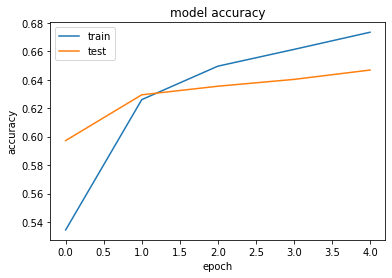

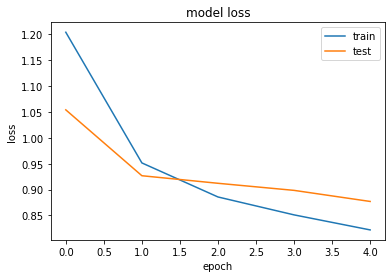

In [32]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [38]:
from keras.optimizers import adam
#in the above model evaluation, loss has been increased hence it is overfitting model, to overcome we will include learning rate
s=adam(lr=0.001)
model1= Sequential()
model1.add(Embedding(5000,max_words))
model1.add(Dropout(0.2))
model1.add(Conv1D(64,kernel_size=3,padding='same',activation='relu',strides=1))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(num_classes,activation='softmax'))
model1.compile(loss='binary_crossentropy',optimizer=s,metrics=['accuracy'])


In [39]:
history1=model1.fit(X_tr, Y_tr, validation_data=(X_te, Y_te),epochs=5, batch_size=51, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 117045 samples, validate on 39015 samples
Epoch 1/5
117045/117045 [==============================] - 32s 273us/step - loss: 0.3496 - accuracy: 0.8466 - val_loss: 0.3227 - val_accuracy: 0.8548
Epoch 2/5
117045/117045 [==============================] - 32s 270us/step - loss: 0.3067 - accuracy: 0.8633 - val_loss: 0.3084 - val_accuracy: 0.8611
Epoch 3/5
117045/117045 [==============================] - 32s 272us/step - loss: 0.2915 - accuracy: 0.8704 - val_loss: 0.3050 - val_accuracy: 0.8623
Epoch 4/5
117045/117045 [==============================] - 32s 270us/step - loss: 0.2810 - accuracy: 0.8758 - val_loss: 0.3050 - val_accuracy: 0.8630
Epoch 5/5
117045/117045 [==============================] - 33s 280us/step - loss: 0.2738 - accuracy: 0.8787 - val_loss: 0.3043 - val_accuracy: 0.8637
